In [1]:
import pandas as pd
import re
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Cleaning Datasets

In [12]:
df1 = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
df1

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [13]:
# Size of loaded dataset
print(df1.shape)

(349, 10)


In [15]:
# Data types
for c in df1.columns:
  print(f"{c}: {type(df1[c][0])}")

Disease: <class 'str'>
Fever: <class 'str'>
Cough: <class 'str'>
Fatigue: <class 'str'>
Difficulty Breathing: <class 'str'>
Age: <class 'numpy.int64'>
Gender: <class 'str'>
Blood Pressure: <class 'str'>
Cholesterol Level: <class 'str'>
Outcome Variable: <class 'str'>


In [16]:
# Check for missing values
missing_values = df1.isnull().sum()
missing_values

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [17]:
# Cleaning column names by removing any white space and special characters from a value
def clean_value(value):
    cleaned_value = re.sub(r'\s+|[^a-zA-Z0-9]', '', str(value))
    return cleaned_value

df1.rename(mapper=clean_value, axis=1, inplace=True)
df1.shape

(349, 10)

In [36]:
df2 = pd.read_csv('Heart Failure Prediction Dataset.csv')
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [37]:
# Size of loaded dataset
print(df2.shape)

(918, 12)


In [38]:
# Data types
for c in df2.columns:
  print(f"{c}: {type(df2[c][0])}")

Age: <class 'numpy.int64'>
Sex: <class 'str'>
ChestPainType: <class 'str'>
RestingBP: <class 'numpy.int64'>
Cholesterol: <class 'numpy.int64'>
FastingBS: <class 'numpy.int64'>
RestingECG: <class 'str'>
MaxHR: <class 'numpy.int64'>
ExerciseAngina: <class 'str'>
Oldpeak: <class 'numpy.float64'>
ST_Slope: <class 'str'>
HeartDisease: <class 'numpy.int64'>


In [39]:
# Check for missing values
missing_values = df2.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [40]:
# Cleaning column names by removing any white space and special characters from a value
def clean_value(value):
    cleaned_value = re.sub(r'\s+|[^a-zA-Z0-9]', '', str(value))
    return cleaned_value

df2.rename(mapper=clean_value, axis=1, inplace=True)
df2.shape

(918, 12)

## Chi-Square Test

Null Hypothesis (H0): There is no association between Fever and Fatigue.

Alternative Hypothesis (H1): There is an association between Fever and Fatigue.

In [18]:
# Examine value counts under Fever column
df1['Fever'].value_counts()

Yes    175
No     174
Name: Fever, dtype: int64

In [19]:
# Examine value counts under Fatigue column
df1['Fatigue'].value_counts()

Yes    242
No     107
Name: Fatigue, dtype: int64

In [20]:
contingency_table = pd.crosstab(df1['Fever'], df1['Fatigue'])
print(contingency_table)

Fatigue  No  Yes
Fever           
No       47  127
Yes      60  115


In [21]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Counts: {expected}")

Chi2 value: 1.8429441937909532
P-value: 0.17460626142730445
Degrees of Freedom: 1
Expected Counts: [[ 53.34670487 120.65329513]
 [ 53.65329513 121.34670487]]


### Insights
The Chi-Square value was 1.8429 which appears to be different from the expected counts. The P-value was 0.174606 which is greater than 0.05. This indicates that there is not a statistically significant association between fever and fatigue. The hypothesis (H1) is rejected.

## T-Test

Null Hypothesis (H0): There is no difference in average resting blood pressures between males and females.

Alternative Hypothesis (H1): There is a difference in average resting blood pressures between males and females.

In [42]:
male_bp = df2[df2['Sex'] == 'M']['RestingBP']
female_bp = df2[df2['Sex'] == 'F']['RestingBP']

print(male_bp)
print(female_bp)

0      140
2      130
4      150
5      120
7      110
      ... 
911    164
913    110
914    144
915    130
917    138
Name: RestingBP, Length: 725, dtype: int64
1      160
3      138
6      130
9      120
10     130
      ... 
901    170
906    132
909    124
912    140
916    130
Name: RestingBP, Length: 193, dtype: int64


In [43]:
t_stat, p_val = ttest_ind(male_bp, female_bp, equal_var=False)

In [44]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.15014692084315165
P-value: 0.8807533088980872


In [45]:
male_bp_mean = male_bp.mean()
female_bp_mean = female_bp.mean()

print(f"Mean prevalence for Males: {male_bp_mean}")
print(f"Mean prevalence for Females: {female_bp_mean}")

Mean prevalence for Males: 132.44551724137932
Mean prevalence for Females: 132.21243523316062


### Insights

The T-statistical value is 0.1501. The p-value is 0.8807, which is much greater than 0.05 and closer to 1. This indicates that the difference in means of resting blood pressures between males and females is not statistically significant. Therefore, the alternative hypothesis is rejected.

## ANOVA

Note- Using the Heart Failure Prediction dataset
Chest Pain Types- TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

Null Hypothesis (H0): There is no difference in resting blood pressures between typical angina (TA), atypical angina (ATA), and non-anginal pain (NAP) chest pain types.

Alternative Hypothesis (H1): There is a difference in resting blood pressures between typical angina (TA), atypical angina (ATA), and non-anginal pain (NAP) chest pain types.

In [46]:
df_table = df2[['ChestPainType', 'RestingBP']]
df_table

,ChestPainType,RestingBP
0,ATA,140
1,NAP,160
2,ATA,130
3,ASY,138
4,NAP,150
...,...,...
913,TA,110
914,ASY,144
915,ASY,130
916,ATA,130


In [47]:
model = ols('RestingBP ~ C(ChestPainType)', data=df_table).fit()

In [48]:
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                         sum_sq     df         F    PR(>F)
C(ChestPainType)    2048.455521    3.0  1.998545  0.112621
Residual          312275.213325  914.0       NaN       NaN


In [49]:
df_table.groupby('ChestPainType')['RestingBP'].mean()

ChestPainType
ASY    133.229839
ATA    130.624277
NAP    130.960591
TA     136.413043
Name: RestingBP, dtype: float64

### Insights

The p-value from this ANOVA test is 0.112621 which is greater than 0.05. This indicates that there is no significant interaction between the resting blood pressures of a person who is experiencing typical angina (TA), atypical angina (ATA), or non-anginal pain (NAP). The null hyopthesis is accepted.



## Regression Analysis

Null Hypothesis (H0): There is no significant relationship between age and serum cholesterol [mm/dl].

Alternative Hypothesis (H1): There is a significant relationship between age and serum cholesterol [mm/dl].

In [55]:
# Columns we are focusing on from the dataset are age and serum cholesterol
df2 = df2[(df2['Age'] - df2['Age'].mean()) / df2['Age'].std() < 3]
df2 = df2[(df2['Cholesterol'] - df2['Cholesterol'].mean()) / df2['Cholesterol'].std() < 3]

In [51]:
X = df2['Age']
y = df2['Cholesterol']

In [52]:
X = sm.add_constant(X)

In [53]:
model2 = sm.OLS(y, X).fit()

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.374
Date:                Sun, 10 Dec 2023   Prob (F-statistic):            0.00390
Time:                        08:41:58   Log-Likelihood:                -5573.7
No. Observations:                 915   AIC:                         1.115e+04
Df Residuals:                     913   BIC:                         1.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        255.8891     20.452     12.512      0.0

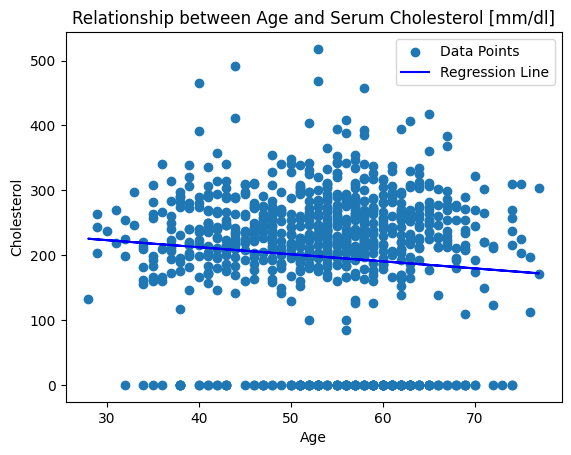

In [54]:
print(model2.summary())

plt.scatter(df2['Age'], df2['Cholesterol'], label='Data Points')
plt.plot(df2['Age'], model2.predict(X), color='blue', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Relationship between Age and Serum Cholesterol [mm/dl]')
plt.legend()
plt.show()

### Insights

There is a negative relation between age and serum cholesterol. The r-squared value is 0.009. This shows that the model does not have a strong fit with the data as only 0.9% of the variance in serum cholesterol is explained by age.